In [1]:
from obspy.core import Stream, read, UTCDateTime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import os.path

In [2]:
path_to_files = '/Users/sydneydybing/StrainProject/2024/'

earthquakes = pd.read_csv(path_to_files + 'M6_catalog_2004-2024.csv', dtype = str)

small_test = False
if small_test:
    earthquakes = earthquakes.iloc[[8]]

weird_events_only = False
if weird_events_only:
    earthquakes = earthquakes.iloc[[4,15]]
    
redo_picks = False
if redo_picks:
    earthquakes = earthquakes.iloc[[3,5,6,8,10,17,19,20,21,24,25,26,27,29]]

origin_times = earthquakes.time.values
mags = earthquakes.mag.values

bsm_mda = pd.read_csv(path_to_files + 'bsm_metadata.csv')
NA_only = bsm_mda.loc[bsm_mda['LONG'] < -110]
stas = NA_only['BNUM'].values

eqs_test = earthquakes[4:5]
ots_test = origin_times[4:5]
mags_test = mags[4:5]
rows_for_extra_times = [8,9,14,16]

In [3]:
earthquakes

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-04-13T15:54:53.808Z,49.215,-129.6178,7,6,mww,228,54,1.719,0.65,...,2023-06-17T21:36:51.040Z,NaN,earthquake,5.71,1.776,0.032,96,reviewed,us,us
1,2022-12-20T10:34:24.770Z,40.525,-124.423,17.91,6.4,mw,38,214,0.0818,0.18,...,2023-12-13T02:59:56.915Z,"15km WSW of Ferndale, CA",earthquake,0.67,0.4,NaN,0,reviewed,nc,nc
2,2022-11-22T16:39:05.789Z,30.7936,-116.3907,10,6.2,mww,164,61,0.494,0.75,...,2023-03-30T07:15:48.466Z,"28 km SW of Las Brisas, Mexico",earthquake,4.14,1.745,0.029,118,reviewed,us,us
3,2021-12-20T20:10:31.310Z,40.3901667,-124.298,27.04,6.2,mw,33,170,0.06557,0.13,...,2022-12-30T01:11:35.632Z,"7km N of Petrolia, CA",earthquake,0.46,0.34,NaN,0,reviewed,nc,nc
4,2021-07-08T22:49:48.110Z,38.5075,-119.4998333,7.45,6,mw,42,100,0.04846,0.06,...,2023-10-18T17:44:37.561Z,"Antelope Valley, CA",earthquake,0.14,0.25,NaN,0,reviewed,nc,nc
5,2020-05-15T11:03:27.176Z,38.1689,-117.8497,2.7,6.5,ml,27,55.79,0.357,0.2669,...,2023-08-25T20:46:08.292Z,"Monte Cristo Range, NV Earthquake",earthquake,NaN,2.1,NaN,NaN,reviewed,nn,nn
6,2020-03-31T23:52:30.781Z,44.4646,-115.1175,12.06,6.5,mww,NaN,31,0.885,0.66,...,2023-11-27T02:38:57.327Z,"Stanley, Idaho",earthquake,8.5,3.8,0.021,212,reviewed,us,us
7,2019-12-25T03:36:01.626Z,50.6106,-129.963,6.58,6.3,mww,NaN,77,1.853,0.67,...,2020-03-14T22:25:03.040Z,"203 km W of Port McNeill, Canada",earthquake,7.2,1.3,0.032,95,reviewed,us,us
8,2019-12-23T20:56:23.555Z,50.5169,-129.7573,10,6,mww,NaN,99,1.042,1.05,...,2020-03-07T17:47:53.040Z,"189 km W of Port McNeill, Canada",earthquake,5.7,1.8,0.038,66,reviewed,us,us
9,2019-12-23T19:49:43.086Z,50.6071,-129.9372,10,6,mww,NaN,100,1.149,1.06,...,2020-03-07T17:47:53.040Z,"201 km W of Port McNeill, Canada",earthquake,4.4,1.8,0.03,106,reviewed,us,us


Earthquake 1/35
2023-04-13


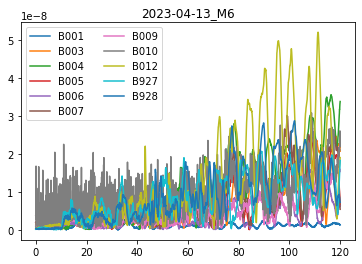

Earthquake 2/35
2022-12-20


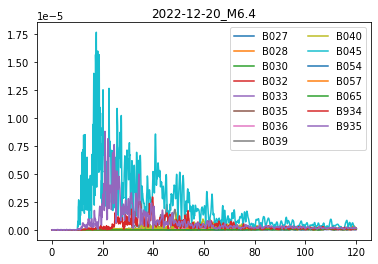

Earthquake 3/35
2022-11-22


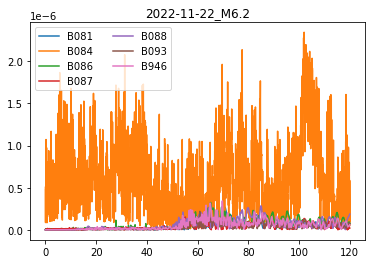

Earthquake 4/35
2021-12-20


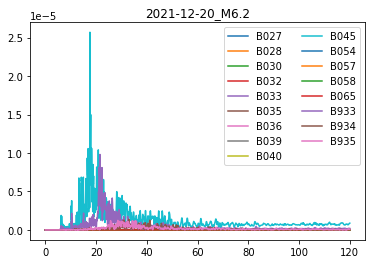

Earthquake 5/35
2021-07-08
Skipping 2021-07-08 B072
Skipping 2021-07-08 B076


/Users/sydneydybing/opt/anaconda3/lib/python3.8/site-packages/obspy/io/mseed/core.py:838: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


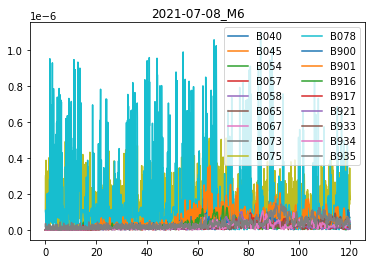

Earthquake 6/35
2020-05-15


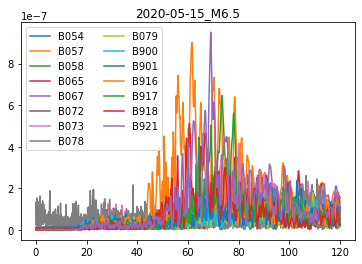

Earthquake 7/35
2020-03-31


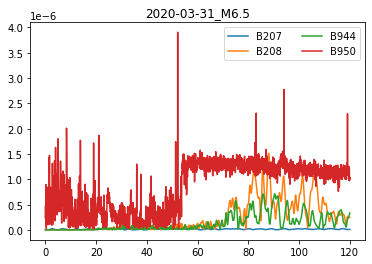

Earthquake 8/35
2019-12-25


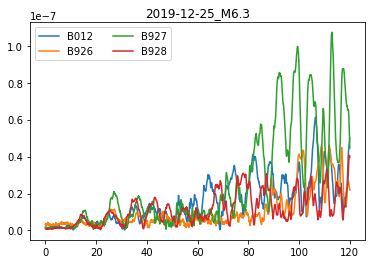

Earthquake 9/35
2019-12-23T20


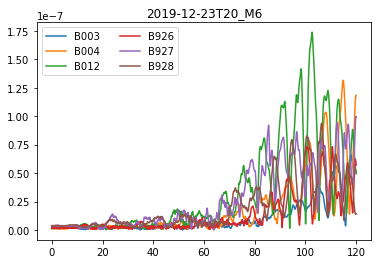

Earthquake 10/35
2019-12-23T19


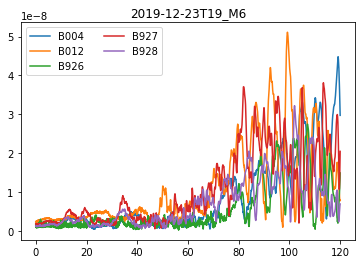

Earthquake 11/35
2019-08-29


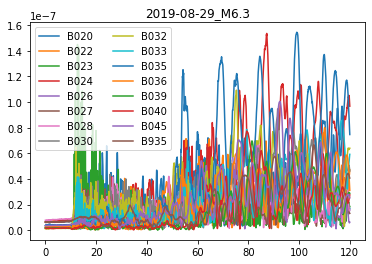

Earthquake 12/35
2019-07-06
Skipping 2019-07-06 B076


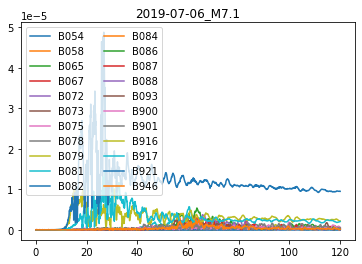

Earthquake 13/35
2019-07-04
Skipping 2019-07-04 B076


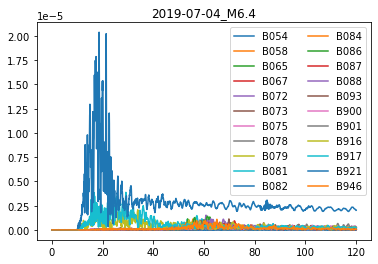

Earthquake 14/35
2019-07-04


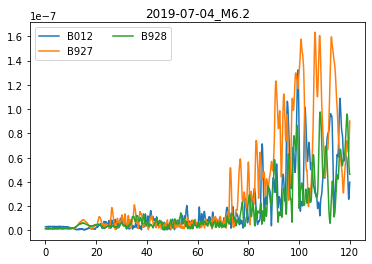

Earthquake 15/35
2018-10-22T06


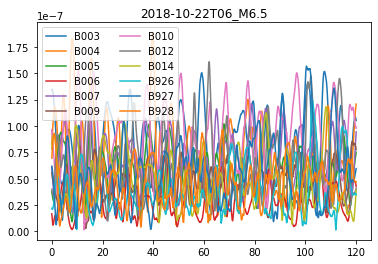

Earthquake 16/35
2018-10-22
Skipping 2018-10-22 B928


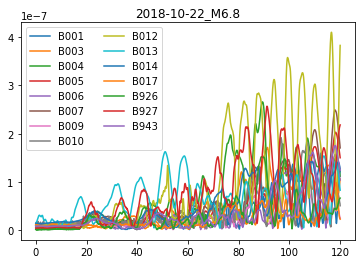

Earthquake 17/35
2018-10-22T05


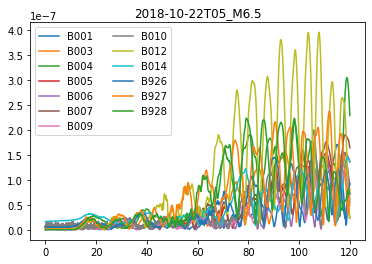

Earthquake 18/35
2018-08-22


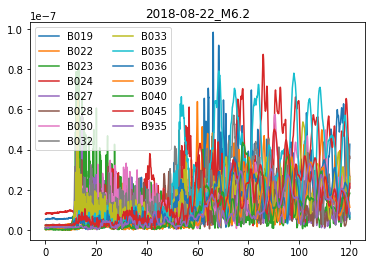

Earthquake 19/35
2016-12-08


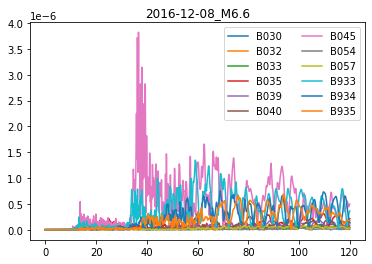

Earthquake 20/35
2014-08-24
Skipping 2014-08-24 B076


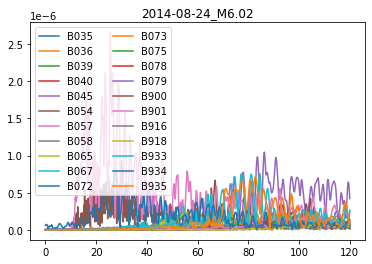

Earthquake 21/35
2014-04-24


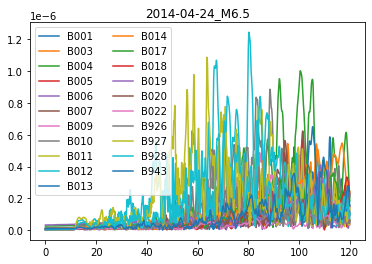

Earthquake 22/35
2014-03-10


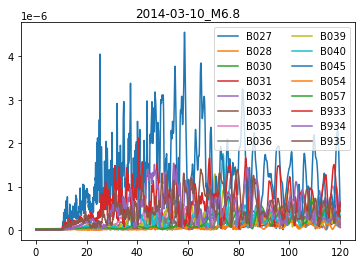

Earthquake 23/35
2013-09-04


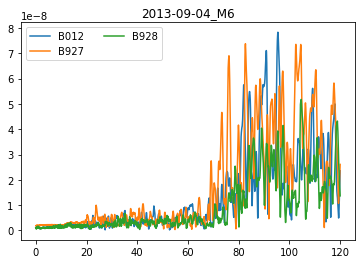

Earthquake 24/35
2013-09-03


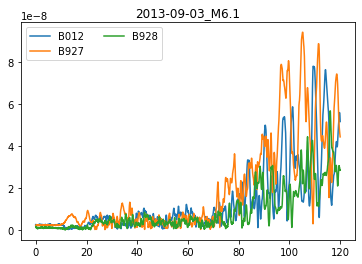

Earthquake 25/35
2012-12-14


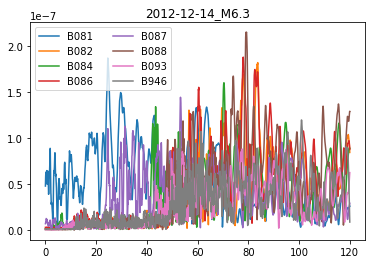

Earthquake 26/35
2012-11-08


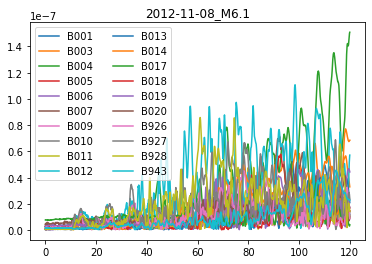

Earthquake 27/35
2012-04-11


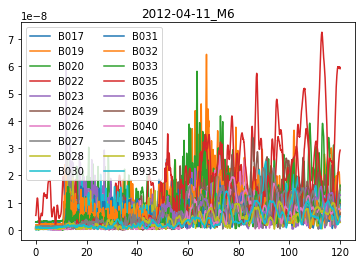

Earthquake 28/35
2011-09-09


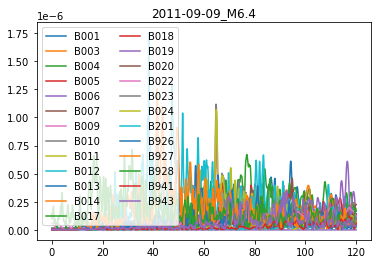

Earthquake 29/35
2010-04-04


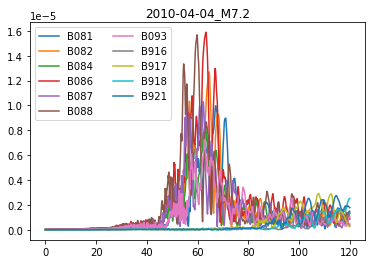

Earthquake 30/35
2010-01-10


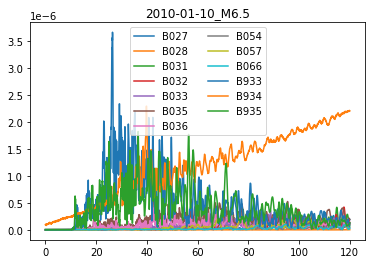

Earthquake 31/35
2008-01-10


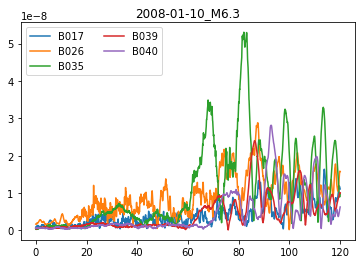

Earthquake 32/35
2005-06-17
No data for 2005-06-17_M6.6
Earthquake 33/35
2005-06-15
No data for 2005-06-15_M7.2
Earthquake 34/35
2004-11-02
No data for 2004-11-02_M6.7
Earthquake 35/35
2004-07-19
No data for 2004-07-19_M6.4


In [4]:
for idx in range(len(earthquakes)):
    
    no_data = False
    ot = origin_times[idx]
    print('Earthquake ' + str(idx+1) + '/' + str(len(mags)))
    
    if idx in rows_for_extra_times:
        cut_ot = ot[:13]
    else:
        cut_ot = ot[:10]
        
    print(cut_ot)
        
    try:
    
        pick_path = path_to_files + 'seismic_data/processed/' + str(cut_ot) + '_M' + str(mags[idx]) + '/picks'
        pick_file = np.genfromtxt(pick_path, dtype = str)
        pick_file_stainfo = pick_file[:,3]

        pick_file_stas = []

        for idx2 in range(len(pick_file_stainfo)):

            pick_file_sta = pick_file_stainfo[idx2].split('.')[1]
            pick_file_stas.append(pick_file_sta)

        pick_file_stas = np.array(pick_file_stas)
    
    except:
        print('No data for ' + str(cut_ot) + '_M' + str(mags[idx]))
        no_data = True
        pass
    
    for sta in stas:
        
        try:
        
            i = np.where(pick_file_stas == sta)[0]
            pick_date = pick_file[i,0][0]
            pick_time = pick_file[i,1][0]
            pick_datetime = UTCDateTime(str(pick_date) + 'T' + str(pick_time) + 'Z')

            starttime = pick_datetime - 10 # 10 seconds before pick time
            endtime = starttime + 120 # full trace will be 2 minutes long

            RMS = read(path_to_files + 'strain_data/filtered_rms/' + str(cut_ot) + '_M' + str(mags[idx]) + '/' + str(sta) + '.mseed')
            # RMS.plot()

            RMS_trim = RMS.trim(starttime = starttime, endtime = endtime, pad = True, fill_value = 0)
            # RMS_trim.plot()

            # Extracting just the RMS data, now trimmed properly, and saving it to a 
            # new miniSEED file.

            RMS_times_trim = RMS_trim[0].times()
            RMS_data_trim = RMS_trim[0].data
            RMS_trim[0].stats.channel = 'tBSR'
            
            # Plot stations, but avoid plotting the weird stations for the two problem earthquakes
            
            if idx == 4 and sta == 'B072' or sta == 'B076':
                print('Skipping ' + str(cut_ot) + ' ' + str(sta))
                
            elif idx == 15 and sta == 'B928':
                print('Skipping ' + str(cut_ot) + ' ' + str(sta))
                
            else:
                plt.title(str(cut_ot) + '_M' + str(mags[idx]))
                plt.plot(RMS_times_trim, RMS_data_trim, label = sta)
#             plt.legend()
#             plt.show()

#             Plot after each station
#             if no_data: 
#                 pass
#             else:
#                 plt.legend(ncol = 2)
#                 plt.show()

            # Create folder for the event
            eq_sta_save_dir = path_to_files + 'strain_data/filtered_trimmed_rms/' + str(cut_ot) + '_M' + str(mags[idx]) + '/'
    #                 print(eq_sta_save_dir)
            if os.path.isdir(eq_sta_save_dir):
                pass
            else:
                os.makedirs(eq_sta_save_dir)

            RMS_trim.write(eq_sta_save_dir + sta + '.mseed', format = 'MSEED')
            
        except:
            pass
    
    # Plot after each earthquake
    if no_data: 
        pass
    else:
        plt.legend(ncol = 2)
        plt.show()  